### Demonstration of SIQCANDAR simulator
##### This is a demonstration of some capabilities of the siqcandar quantum computation simulator. For an example of the circuit drawing function, a separate demo2.py demo file will be found in the repository.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import siqcandar as siqc
import time
%matplotlib inline

##### 1. State initialization
##### The quantum circuits can be initialized to the ground state, a randomly generated state, or a custom state vector provided as an input. States with complex coefficients are supported. (If the input custom state vector is not of unit norm, an assertion will get fired.)

In [2]:
#Create the circuits and then initialize

# Initialize to ground state
qa = siqc.siqc_ckt(name="qa", num_qubits=1)
qa.init_state(init_type="GROUND")
print("Initialized qa to ground state. state vector =\n", np.vstack(qa.st_vec))

# Initialize to custom state
qb = siqc.siqc_ckt(name="qb", num_qubits=2)
psi = np.array([1/np.sqrt(13), np.sqrt(2)/np.sqrt(13), -1*np.sqrt(3)/np.sqrt(13), np.sqrt(7)/np.sqrt(13)])
qb.init_state(init_type="CUSTOM", st_vec=psi)
print("Initialized qb to custom state. state vector =\n", np.vstack(qb.st_vec))

# Initialize to random state
qc = siqc.siqc_ckt(name="qc", num_qubits=3)
qc.init_state(init_type="RANDOM")
print("Initialized qc to random state. state vector =\n", np.vstack(qc.st_vec))

Initialized qa to ground state. state vector =
 [[1.+0.j]
 [0.+0.j]]
Initialized qb to custom state. state vector =
 [[ 0.2773501 ]
 [ 0.39223227]
 [-0.48038446]
 [ 0.73379939]]
Initialized qc to random state. state vector =
 [[ 0.29713523+0.07392377j]
 [-0.33575307-0.08264602j]
 [ 0.1600733 +0.16418852j]
 [ 0.35037793-0.27719809j]
 [-0.13900744+0.3975253j ]
 [ 0.27579938-0.30798192j]
 [ 0.38045339-0.05183901j]
 [-0.19380205-0.03523835j]]


##### A method is also provided to initalize state vector via the label of the state in binary, as in to generate the state vector for |0101>.

In [3]:
qd = siqc.siqc_ckt(name="qd", num_qubits=2)
psi = qd.give_state_by_label("00") + qd.give_state_by_label("11")*1j
psi /= np.linalg.norm(psi)
qd.init_state(init_type="CUSTOM", st_vec=psi)
print("Initialized qd to custom state via labels. state vector =\n", np.vstack(qd.st_vec))

Initialized qd to custom state via labels. state vector =
 [[0.70710678+0.j        ]
 [0.        +0.j        ]
 [0.        +0.j        ]
 [0.        +0.70710678j]]


##### 2. Basic quantum gates
##### In order to apply a quantum gate, the user has to specify a program, which is a list of dicts specifying the quantum gates. In the current implementation, a gate operation refers to the specified gate type acting on a single target qubit. It can also be a controlled gate, with a single control qubit case being currently supported. The supported gate types are H,X,Y,Z,I,S,T and PARAMETRIC gates. The simulator follows the little endian convention, ie qubits are numbered as |q3 q2 q1 q0>

##### Non-controlled gate

In [4]:
#Non-controlled gate
qe = siqc.siqc_ckt(name="qe", num_qubits=1)
psi = qe.give_state_by_label("1")
qe.init_state(init_type="CUSTOM", st_vec=psi)
print("Initialized qe to the state\n", np.vstack(qe.st_vec))

#Hadamard gate, followed by S gate
program = [{"gate_type" : "H", "target" : 0},
           {"gate_type" : "S", "target" : 0}]
qe.execute_ckt(program)

#Expected state should be (|0>-i|1>)/sqrt(2)
print("After executing the program, final state of qe is\n", np.vstack(qe.st_vec))

Initialized qe to the state
 [[0.]
 [1.]]
After executing the program, final state of qe is
 [[0.70710678+0.j        ]
 [0.        -0.70710678j]]


##### Controlled gates

In [5]:
#Controlled H gate
#circuit is |q1 q0>
#Case 1 - Control qubit is |1>
qf = siqc.siqc_ckt(name="qf", num_qubits=2)
psi = qf.give_state_by_label("01")
qf.init_state(init_type="CUSTOM", st_vec=psi)
program = [{"gate_type" : "H", "target" : 1, "control" : 0}]
qf.execute_ckt(program)

#Expected state should be (|01> + |11>)/sqrt(2)
print("After executing the program, final state of qf is\n", np.vstack(qf.st_vec))

#Case 2 - Control qubit is |0>
qg = siqc.siqc_ckt(name="qg", num_qubits=2)
psi = qg.give_state_by_label("10")
qg.init_state(init_type="CUSTOM", st_vec=psi)
program = [{"gate_type" : "H", "target" : 1, "control" : 0}]
qg.execute_ckt(program)

#Expected state should be |10>
print("After executing the program, final state of qg is\n", np.vstack(qg.st_vec))

#Case 3 - Control qubit is (|0> + |1>)/sqrt(2)
qh = siqc.siqc_ckt(name="qh", num_qubits=2)
psi = qh.give_state_by_label("00") + qh.give_state_by_label("01")
psi /= np.linalg.norm(psi)
qh.init_state(init_type="CUSTOM", st_vec=psi)
program = [{"gate_type" : "H", "target" : 1, "control" : 0}]
qh.execute_ckt(program)

#Expected state should be (|00>/sqrt(2)) + (|01>/2) + (|11>/2)
print("After executing the program, final state of qh is\n", np.vstack(qh.st_vec))

After executing the program, final state of qf is
 [[0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]
 [0.70710678+0.j]]
After executing the program, final state of qg is
 [[0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]]
After executing the program, final state of qh is
 [[0.70710678+0.j]
 [0.5       +0.j]
 [0.        +0.j]
 [0.5       +0.j]]


##### 3. The statevector visualizer
##### The simulator supports a method to visualize the quantum state with its probability amplitudes and phase values. Positive phase is shown blue, negative phase is shown in red and 0 phase is shown as black. The intensity of the colour is proportional to the absolute magnitude of  the phase.

Visualizing the state for qi after applying H gate to ground state:


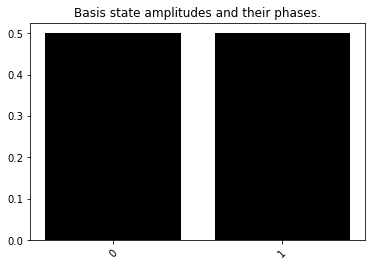

Height is equal to magnitude of the probability amplitude. Phase is depicted by colour. Blue means a positive phase; red stands for negative phase and black colour depicts a real number. A higher red/blue colour intensity means a higher absolute phase angle.


In [6]:
qi = siqc.siqc_ckt(name="qi", num_qubits=1)
qi.init_state(init_type="GROUND")
program = [{"gate_type" : "H", "target" : 0}]
qi.execute_ckt(program)
print("Visualizing the state for qi after applying H gate to ground state:")
qi.visualize_state()

Visualizing the state for qi after applying S gate:


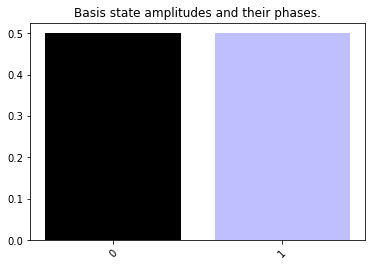

Height is equal to magnitude of the probability amplitude. Phase is depicted by colour. Blue means a positive phase; red stands for negative phase and black colour depicts a real number. A higher red/blue colour intensity means a higher absolute phase angle.


In [7]:
#Apply S gate to this circuit
program = [{"gate_type" : "S", "target" : 0}]
qi.execute_ckt(program)
print("Visualizing the state for qi after applying S gate:")
qi.visualize_state()

Visualizing the state for qi after applying T:


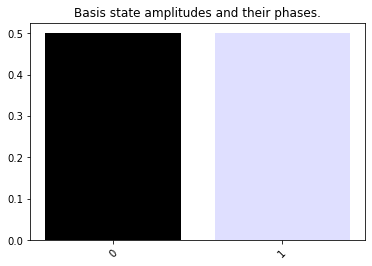

Height is equal to magnitude of the probability amplitude. Phase is depicted by colour. Blue means a positive phase; red stands for negative phase and black colour depicts a real number. A higher red/blue colour intensity means a higher absolute phase angle.


In [8]:
#Apply T gate
program = [{"gate_type" : "T", "target" : 0}]
qi.execute_ckt(program)
print("Visualizing the state for qi after applying T:")
qi.visualize_state()

##### Visualization for random state

Visualizing the state for qj after initializing randomly to the state
 [[ 0.36642963+0.04002511j]
 [-0.22825446-0.33303255j]
 [ 0.22184706+0.34257016j]
 [-0.31109821-0.36295175j]
 [ 0.13296714+0.25406867j]
 [ 0.24528593-0.02601261j]
 [ 0.07125825-0.13724287j]
 [ 0.05053867+0.3694449j ]] The phases are
 [[ 0.10879867]
 [-2.17164391]
 [ 0.99611296]
 [-2.27941737]
 [ 1.08864278]
 [-0.10565525]
 [-1.09189692]
 [ 1.43484393]]


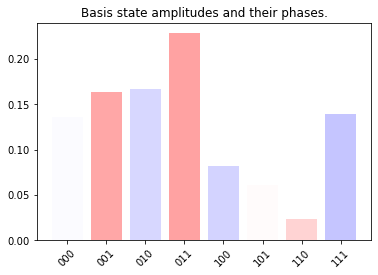

Height is equal to magnitude of the probability amplitude. Phase is depicted by colour. Blue means a positive phase; red stands for negative phase and black colour depicts a real number. A higher red/blue colour intensity means a higher absolute phase angle.


In [9]:
qj = siqc.siqc_ckt(name="qj", num_qubits=3)
qj.init_state(init_type="RANDOM")
print("Visualizing the state for qj after initializing randomly to the state\n", np.vstack(qj.st_vec),
      "The phases are\n", np.vstack(np.angle(qj.st_vec)))
qj.visualize_state()

##### 4. Measurement, % measurement and plotting measurement results
##### The simulator has a method to perform the measurement of all qubits in the computational basis. It generates the measurement outcomes randomly by using the probability mass function obtained from the state vector (aka weighted random sampling). The number of random trials is specified by num_shots. I didn't know that python had such a sampler, so I implmented my own :D. The measurement outcomes can be obtained as frequency of outcomes, in percentage and can also be plotted in a bar graph.

In [10]:
# Measuring the circuit qi
# Displaying results in %
print("Measuring the circuit qi. State of qi is\n", np.vstack(qi.st_vec))
qi.measure_ckt(num_shots=1024, reporting_type="PERCENT")

Measuring the circuit qi. State of qi is
 [[0.70710678+0.j ]
 [0.5       +0.5j]]
Results ( PERCENT ): {'0': 48.53515625, '1': 51.46484375}


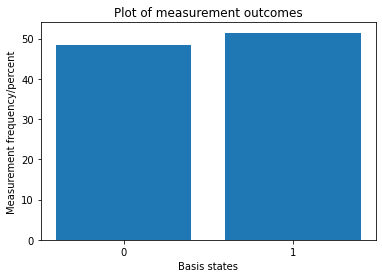

In [11]:
qi.plot_measure_results()

State of qk =
 [[0.        +0.j        ]
 [0.70710678+0.j        ]
 [0.        +0.j        ]
 [0.        +0.j        ]
 [0.        +0.j        ]
 [0.        -0.70710678j]
 [0.        +0.j        ]
 [0.        +0.j        ]] 
The expected probabilities of measuring bases states are
 [[0. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]
 [0.5]
 [0. ]
 [0. ]] 
Measuring the circuit qk.
Results ( COUNT ): {'000': 0, '001': 5038, '010': 0, '011': 0, '100': 0, '101': 4962, '110': 0, '111': 0}


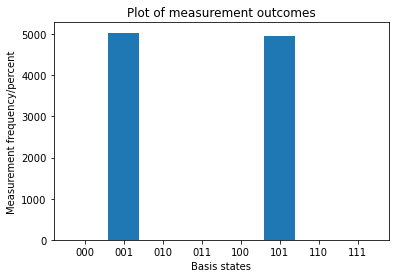

In [12]:
# Measuring a multi-qubit circuit
qk = siqc.siqc_ckt(name="qk", num_qubits=3)
qk.init_state(init_type="GROUND")
program = [{"gate_type" : "X", "target" : 0},
           {"gate_type" : "X", "target" : 2, "control" : 0},
           {"gate_type" : "H", "target" : 2},
           {"gate_type" : "S", "target" : 2}]
qk.execute_ckt(program)
print("State of qk =\n", np.vstack(qk.st_vec), 
      "\nThe expected probabilities of measuring bases states are\n", np.vstack(np.power(np.abs(qk.st_vec),2)),
      "\nMeasuring the circuit qk.")
# Showing results in actual frequency of outcomes (which is also the default)
qk.measure_ckt(num_shots=10000, reporting_type="COUNT")
qk.plot_measure_results()

State of ql =
 [[ 0.21444045+0.10718161j]
 [ 0.46291984-0.29841006j]
 [-0.41190276+0.45635745j]
 [ 0.42327306+0.28652745j]] 
The expected probabilities of measuring bases states are
 [[0.0574726 ]
 [0.30334334]
 [0.377926  ]
 [0.26125806]] 
Measuring the circuit ql.
Results ( COUNT ): {'00': 592, '01': 3047, '10': 3772, '11': 2589}


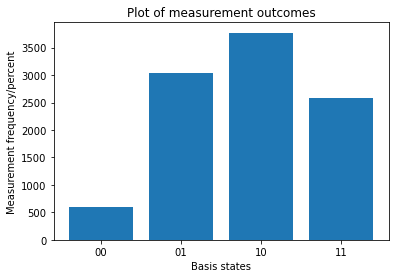

In [13]:
# Measuring a random, possibly complex state
ql = siqc.siqc_ckt(name="qk", num_qubits=2)
ql.init_state(init_type="RANDOM")
print("State of ql =\n", np.vstack(ql.st_vec), 
      "\nThe expected probabilities of measuring bases states are\n", np.vstack(np.power(np.abs(ql.st_vec),2)),
      "\nMeasuring the circuit ql.")
# Showing results in actual frequency of outcomes (which is also the default)
ql.measure_ckt(num_shots=10000, reporting_type="COUNT")
ql.plot_measure_results()


##### 5. State history and operations history
##### It is possible to view the history of states that the circuit has been in as a result of initialization or application of gates. (Currently, states of a measured circuits are not collapsed) The simulator can also keep track of the operations applied to the circuit. This is useful for the circuit drawer method.

In [14]:
print("The sequence of operations applied on the circuit qk are:\n", qk.op_hist)
print("\nThe states of qk due to these operations are:\n", qk.st_hist)

The sequence of operations applied on the circuit qk are:
 [{'initialize': ''}, {'gate_type': 'X', 'target': 0, 'control': None, 'parametric_gate': None, 'parameters': None}, {'gate_type': 'X', 'target': 2, 'control': 0, 'parametric_gate': None, 'parameters': None}, {'gate_type': 'H', 'target': 2, 'control': None, 'parametric_gate': None, 'parameters': None}, {'gate_type': 'S', 'target': 2, 'control': None, 'parametric_gate': None, 'parameters': None}, {'measure': ''}]

The states of qk due to these operations are:
 [array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]), array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]), array([ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j, -0.70710678+0.j,  0.        +0.j,  0.        +0.j]), array([0.        +0.j        , 0.70710678+0.j        ,
       0.        +0.j        , 0.        +0.j      

##### 6. Parameterized gates and running a variational algorithm
##### The parametric gate matrix can be passed as a list. The simulator will replace the parameters provided in a dict to calculate the gate matrix. Please ensure that the parameter names do not match with common functions, like exp, cos etc!
##### A Non-controlled parametric gate is demonstrated. A single qubit-controlled parameterized gate acting on a single qubit is also supported.

In [15]:
qm = siqc.siqc_ckt(name="qm", num_qubits=2, tolerance=10**(-6))
#U3 gate - parameters theta, alpha, phi
my_u3 = [["cos(0.5 * theta)"                , "-1 * exp(alpha * 1j) * sin(0.5 * theta)"],
         ["exp(phi * 1j) * sin(0.5 * theta)", "exp((phi + alpha) * 1.0j) * cos(0.5 * theta)"]]
my_u3_params = {"theta" : 1.0471975511965976,
                "phi"   : 1.0471975511965976,
                "alpha" : 1.0471975511965976} #all pi/3
psi = qm.give_state_by_label("00") + qm.give_state_by_label("01") + qm.give_state_by_label("10") + qm.give_state_by_label("11")
psi /= np.linalg.norm(psi)
program = [{"gate_type" : "PARAMETRIC", "target" : 0, "control" : None, 
            "parametric_gate" : my_u3, "parameters" : my_u3_params}]

qm.init_state(init_type="CUSTOM", st_vec=psi)
qm.execute_ckt(program)

#Calculating the expected state
exp_u3_gate =  np.array([[np.cos(0.5 * my_u3_params["theta"]),
                          -1 * np.exp(my_u3_params["alpha"] * 1j) * np.sin(0.5 * my_u3_params["theta"])],
                         [np.exp(my_u3_params["phi"] * 1j) * np.sin(0.5 * my_u3_params["theta"]),
                          np.exp((my_u3_params["phi"] + my_u3_params["alpha"]) * 1.0j) * np.cos(0.5 * my_u3_params["theta"])]])
#overall gate acting on the circuit is I kron exp_u3_gate
overall_gate = np.kron(np.array([[1,0],[0,1]]), exp_u3_gate)
exp_state = np.matmul(overall_gate, np.array([0.5,0.5,0.5,0.5]))

print("The expected state is\n", np.vstack(exp_state))
print("The actual obtained state is\n", np.vstack(qm.st_vec))
print("The error between the expected and obtained state is", np.linalg.norm(exp_state-qm.st_vec))

The expected state is
 [[ 0.3080127 -0.21650635j]
 [-0.09150635+0.59150635j]
 [ 0.3080127 -0.21650635j]
 [-0.09150635+0.59150635j]]
The actual obtained state is
 [[ 0.3080127 -0.21650635j]
 [-0.09150635+0.59150635j]
 [ 0.3080127 -0.21650635j]
 [-0.09150635+0.59150635j]]
The error between the expected and obtained state is 1.1102230246251565e-16


##### Running a simple variational algorithm (this can be enhanced in future work)

In [16]:
#trying to approximate the uniform distribution
target_dist = np.array([0.5,0.5])

# Optimizing via grid search
g_theta_0 = np.linspace(-1*np.pi,np.pi,15)
g_alpha_0 = np.linspace(-1*np.pi,np.pi,15)
g_phi_0 = np.linspace(-1*np.pi,np.pi,15)
print(g_theta_0)
min_cost = +100000000
i=0

for theta_0 in g_theta_0:
    for alpha_0 in g_alpha_0:
        for phi_0 in g_phi_0:
            #if(i % 100 == 0):
            #    print("overall iteration index =", i)
            i = i + 1
            qn = siqc.siqc_ckt(name="qn", num_qubits=1, tolerance=10**(-6))
            qn.init_state(init_type="CUSTOM", st_vec=np.array([1/np.sqrt(2),1/np.sqrt(2)]))
            my_u3_0 = [["cos(0.5 * theta)"                , "-1 * exp(alpha * 1j) * sin(0.5 * theta)"],
                       ["exp(phi * 1j) * sin(0.5 * theta)", "exp((phi + alpha) * 1.0j) * cos(0.5 * theta)"]]
            program = [{"gate_type" : "PARAMETRIC", "target" : 0, "control" : None, "parametric_gate" : my_u3_0,
                        "parameters" : {"theta" : theta_0, "alpha" : alpha_0, "phi" : phi_0}}]
            qn.execute_ckt(program)
            qn.measure_ckt(num_shots=5000, quiet=True)
            #calculating loss
            cost = 0
            for p in range(qn.st_dim):
                cost += np.power(np.abs(target_dist[p]-(qn.results[qn.get_bin(p,qn.num_qubits)])/5000),2)
            #if(i % 100 == 0):
            #    print("cost = ", cost)
            if(cost < min_cost):
                min_cost = cost
                print("Updating minimum cost to", min_cost)
                opt_params = []
                opt_params = {"theta_0" : theta_0, "alpha_0": alpha_0, "phi_0" : phi_0}
print("Optimal parameters obtained are:", opt_params, "\nminimum cost is: ", min_cost)

[-3.14159265 -2.6927937  -2.24399475 -1.7951958  -1.34639685 -0.8975979
 -0.44879895  0.          0.44879895  0.8975979   1.34639685  1.7951958
  2.24399475  2.6927937   3.14159265]
Updating minimum cost to 9.679999999999823e-06
Updating minimum cost to 6.480000000000172e-06
Updating minimum cost to 2.8799999999998987e-06
Updating minimum cost to 3.199999999999739e-07
Updating minimum cost to 7.999999999998237e-08
Updating minimum cost to 0.0
Optimal parameters obtained are: {'theta_0': -3.141592653589793, 'alpha_0': 0.0, 'phi_0': 1.7951958020513104} 
minimum cost is:  0.0


##### 7. Miscellaneous
##### A. Multiple qubit circuit and swap operation

In [17]:
#Just to try out a scenario of interest, to test out the controlled gate implementation
#Let us try to construct the 3-qubit state |0>|+>|1> and swap qubits 0 and 2
qr = siqc.siqc_ckt(name="qr", num_qubits=3)
qr.init_state(init_type="GROUND")
program = [{"gate_type" : "X", "target" : 0},
           {"gate_type" : "H", "target" : 1},
           {"gate_type" : "X", "target" : 0, "control" : 2},
           {"gate_type" : "X", "target" : 2, "control" : 0},
           {"gate_type" : "X", "target" : 0, "control" : 2}]
qr.execute_ckt(program)

#To calculate the expected output state ie |1>|+>|0>
ket_0 = np.array([1,0])
ket_1 = np.array([0,1])
ket_plus = (1/np.sqrt(2))*(ket_0 + ket_1)
exp_st = np.kron(ket_1,np.kron(ket_plus,ket_0))
print("Expected output state =\n", np.vstack(exp_st))
print("Obtained output state =\n",np.vstack(qr.st_vec))
print("Error between expected and observed states =", np.linalg.norm(np.abs(exp_st-qr.st_vec)))

Expected output state =
 [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]]
Obtained output state =
 [[0.        +0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]]
Error between expected and observed states = 0.0


##### B. Bloch angles calculation

In [18]:
#The simulator has a (rudimentary, work-in-progress) method to calculate the Bloch vector angles theta and phi
#of a 1-qubit state.
qs = siqc.siqc_ckt(name="qs", num_qubits=1)
qs.init_state(init_type="GROUND")
program = [{"gate_type" : "H", "target" : 0},
           {"gate_type" : "S", "target" : 0}]
qs.execute_ckt(program)
theta, phi = qs.give_bloch_angles()
print("State =\n", np.vstack(qs.st_vec))
print("\nObtained Bloch angles (in radian) are theta =", theta, ", phi =", phi)

State =
 [[0.70710678+0.j        ]
 [0.        +0.70710678j]]

Obtained Bloch angles (in radian) are theta = 1.5707963267948968 , phi = 1.5707963267948966


##### C.  Performance of the simulator for higher number of qubits

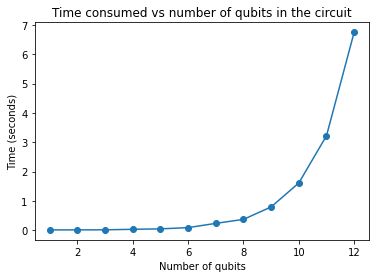

In [19]:
#Let us try to push the simulator to its limits in terms of number of qubits to see its performance
#On my machine, the simulator runs into memory usage issues after 12 qubits
max_qubits=12
perf = np.zeros(max_qubits)
start = 0
for n in range(1,max_qubits+1):
    start = time.time()
    #print("Simulating number of qubits =",n)
    qt = siqc.siqc_ckt(name="qt", num_qubits=n)
    qt.init_state(init_type="GROUND")
    program = [{"gate_type" : "H", "target" : 0}]
    qt.execute_ckt(program)
    qt.measure_ckt(num_shots=1000, quiet=True)
    perf[n-1] = time.time() - start

plt.plot(np.arange(1,max_qubits+1,1), perf, marker='o')
plt.title("Time consumed vs number of qubits in the circuit")
plt.xlabel('Number of qubits')
plt.ylabel('Time (seconds)')
plt.show()

##### Discussion on possible performance improvement
###### The time consumed seems to grow exponentially in the number of qubits. For simulating and measuring a simple circuit of 12 qubits, the time taken is around 7 seconds. In the current simulator, it is the memory requirement which limits its usage for higher number of qubits than (around) 12. Some methods which colud be explored to make the memory usage efficient might be:
###### A) Using sparse arrays for gate matrices
###### B) Using tensor state decompositions

##### This concludes this demo. For more interesting computations which can be simulated on this simulator, like controlled gates, parametric gates, and more, do check out the test_plan.xlsx and test_scenarios.py files! P.S. Please do try the circuit drawing demo in the demo2.py file!

##### The ones to be thanked for motivating this work:
##### -QOSF
##### -Petar Korponaić, Quantastica for the task description